In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

import sys
import pickle as pkl
sys.path.append("../Utils/")
from Detector import *
from Plot_Histogram import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Extract Simulation file:
Sim12 = pkl.load(open("../Sample/Simulation/OscNext_Level7_v02.00_120000_pass2_variables_NoCut.pkl", "rb"))
Sim14 = pkl.load(open("../Sample/Simulation/OscNext_Level7_v02.00_140000_pass2_variables_NoCut.pkl", "rb"))
Sim16 = pkl.load(open("../Sample/Simulation/OscNext_Level7_v02.00_160000_pass2_variables_NoCut.pkl", "rb"))
Sim = [Sim12['120000'], Sim14['140000'], Sim16['160000']]

MCdict = dict()
for key in Sim12['120000'].keys():
    MCdict[key] = np.array([])
    for s in Sim:
        MCdict[key] = np.concatenate((MCdict[key], s[key]), axis=None) 

Cut = [ApplyCut(Sim12['120000']), ApplyCut(Sim14['140000']), ApplyCut(Sim16['160000'])]
MCcut = dict()
for key in Cut[0].keys():
    MCcut[key] = np.array([])
    for c in Cut:
        MCcut[key] = np.concatenate((MCcut[key], c[key]), axis=None) 


In [8]:

print(len(MCdict['true_Energy']))
print(len(MCcut['E_true']))
loc = np.where((MCcut['E_true']>0.5) & (MCcut['E_true']<1.5))
len(MCcut['E_true'][loc])
MCcut['psi_true']

8131391
5810757


array([ 78.01677276,  43.49210912,  62.31341885, ...,  83.78406131,
       126.96514815,   5.86865256])

In [9]:
# mass: true binning depends on the DM mass
mass = 100

# Binning:
# E true
Etrue_center = np.linspace(1., mass, 100)
Ewidth = (mass-1.)/(100.-1.)
Etrue_edges = [E - Ewidth/2. for E in Etrue_center]
Etrue_edges.append(Etrue_center[-1] + Ewidth/2.)
# Psi true
Psitrue_edges = np.linspace(0, 180, 51)
Psiwidth = 180./50.
Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
# E reco
Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
# Psi reco
Psireco_edges = np.linspace(0., 180., 18+1)
Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

# PID
PID_edges = np.array([0.,0.5,0.85,1.])
PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

Bin = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)




In [10]:
outfile = "./PreComp/ResponseMatrix_mass_{}.pkl".format(mass)
Resp = MakeResponseMatrix(MCcut, Bin, outfile)

In [11]:
Resp.keys()
Resp['nu_e'].shape


(50, 100, 3, 18, 50)

/var/folders/v4/4lt7t62s39z5v7kv83wk_b440000gn/T/ipykernel_1898/2400341938.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_2DHist(h, np.array([Psitrue_edges, Psireco_edges]), "Psi true", "Psi reco", "psi resolution")


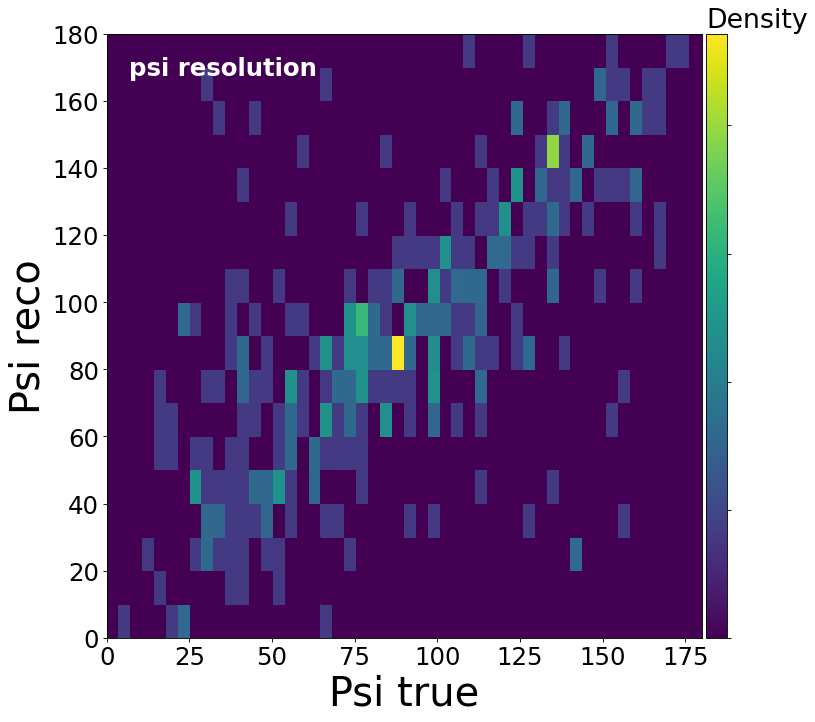

In [13]:
h = Resp['nu_e'][0:50, 50, 0, 0:18, 25]
h.shape

plot_2DHist(h, np.array([Psitrue_edges, Psireco_edges]), "Psi true", "Psi reco", "psi resolution")
# Psitrue_edges.shape


In [14]:
# Compute Response matrix for multiple masses:
masses = [6, 10, 30, 50, 70, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for mass in masses:
    # Binning:
    # E true
    Etrue_center = np.linspace(1., mass, 100)
    Ewidth = (mass-1.)/(100.-1.)
    Etrue_edges = [E - Ewidth/2. for E in Etrue_center]
    Etrue_edges.append(Etrue_center[-1] + Ewidth/2.)
    # Psi true
    Psitrue_edges = np.linspace(0, 180, 51)
    Psiwidth = 180./50.
    Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
    # E reco
    Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
    Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
    # Psi reco
    Psireco_edges = np.linspace(0., 180., 18+1)
    Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

    # PID
    PID_edges = np.array([0.,0.5,0.85,1.])
    PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

    Bin = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                    Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)

    # Response Matrix
    outfile = "./PreComp/ResponseMatrix_mass_{}.pkl".format(mass)
    Resp = MakeResponseMatrix(MCcut, Bin, outfile)
    